In [1]:
import http.client
import json
import pandas as pd
from google.oauth2 import service_account
import pandas_gbq

In [2]:
Credentials = service_account.Credentials.from_service_account_file("/Users/aleksandrgulyanskiy/gulianskii_Bigquery_key.json")


In [3]:
project_id = "prello-453310"
dataset = "Prello_project"
table = "mart_main_kpis"

In [4]:
pandas_gbq.context.credentials = Credentials
pandas_gbq.context.project = project_id

In [5]:
query = f"SELECT * FROM `{project_id}.{dataset}.{table}` TABLESAMPLE SYSTEM (1 PERCENT) "
#ORDER BY RAND()
#LIMIT 10000
#TABLESAMPLE SYSTEM (5 PERCENT) 
#LIMIT 100000
df = pandas_gbq.read_gbq(query)
#df_sample = df.sample(n=10000, random_state=42)  

df.head()
df.tail()


Downloading: 100%|██████████|


,department_code,department_name,municipality_code,rental_appart,rental_house,sales_price_m_2,surface,total_sales_price,premise_type,yield_rental,...,sum_nb_poi,avg_importance_per_poi,avg_sum_sales_amount_over_time,pct_growth_sales_amount_over_time,avg_total_m2_over_time,pct_growth_total_m2_over_time,avg_nb_of_principal_rooms_over_time,pct_growth_nb_of_principal_rooms_over_time,avg_sales_price_m_2_over_time,pct_growth_sales_price_m_2_over_time
505511,78,Yvelines,78265,20.94,16.96,4185.0,68.0,284580.0,Maison,0.048631,...,1,0.05,6.219607e+06,0.386811,86.446629,0.041018,3.519701,0.10614,3605.180237,0.108583
505512,78,Yvelines,78265,20.94,16.96,4269.0,82.0,350058.0,Maison,0.047674,...,1,0.05,6.219607e+06,0.386811,86.446629,0.041018,3.519701,0.10614,3605.180237,0.108583
505513,78,Yvelines,78265,20.94,16.96,1311.0,140.0,183540.0,Maison,0.155240,...,1,0.05,6.219607e+06,0.386811,86.446629,0.041018,3.519701,0.10614,3605.180237,0.108583
505514,78,Yvelines,78265,20.94,16.96,1701.0,147.0,250047.0,Maison,0.119647,...,1,0.05,6.219607e+06,0.386811,86.446629,0.041018,3.519701,0.10614,3605.180237,0.108583
505515,78,Yvelines,78265,20.94,16.96,3041.0,210.0,638610.0,Maison,0.066925,...,1,0.05,6.219607e+06,0.386811,86.446629,0.041018,3.519701,0.10614,3605.180237,0.108583


In [6]:
df.shape

(505516, 37)

In [7]:
df.columns

Index(['department_code', 'department_name', 'municipality_code',
       'rental_appart', 'rental_house', 'sales_price_m_2', 'surface',
       'total_sales_price', 'premise_type', 'yield_rental', 'BEP_in_years',
       'avg_sal_by_dept_code_overtime', 'median_salary_overtime',
       'avg_sal_to_median_salary_overtime', 'avg_sal_yoy_growth_ratio',
       'avg_total_sales_per_municip', 'avg_sales_per_citizen',
       'avg_principal_home', 'avg_second_home', 'avg_vacants_housing',
       'avg_tot_housing', 'population', 'ratio_population_to_principal_home',
       'ratio_population_to_second_home',
       'ratio_population_to_vacants_housing',
       'ratio_population_to_tot_housing', 'cnt_poi', 'sum_nb_poi',
       'avg_importance_per_poi', 'avg_sum_sales_amount_over_time',
       'pct_growth_sales_amount_over_time', 'avg_total_m2_over_time',
       'pct_growth_total_m2_over_time', 'avg_nb_of_principal_rooms_over_time',
       'pct_growth_nb_of_principal_rooms_over_time',
       'avg_sa

In [8]:
df["department_code"] = df["department_code"].astype(float)
df["municipality_code"] = df["municipality_code"].astype(float)

df.dtypes

department_code                               float64
department_name                                object
municipality_code                             float64
rental_appart                                 float64
rental_house                                  float64
sales_price_m_2                               float64
surface                                       float64
total_sales_price                             float64
premise_type                                   object
yield_rental                                  float64
BEP_in_years                                  float64
avg_sal_by_dept_code_overtime                 float64
median_salary_overtime                        float64
avg_sal_to_median_salary_overtime             float64
avg_sal_yoy_growth_ratio                      float64
avg_total_sales_per_municip                   float64
avg_sales_per_citizen                         float64
avg_principal_home                            float64
avg_second_home             

total_sales_price                             1.000000
sales_price_m_2                               0.618348
BEP_in_years                                  0.570195
surface                                       0.513460
avg_sales_price_m_2_over_time                 0.431475
avg_sal_by_dept_code_overtime                 0.378146
avg_sal_to_median_salary_overtime             0.378066
rental_house                                  0.367640
rental_appart                                 0.351436
avg_total_sales_per_municip                   0.213477
avg_total_m2_over_time                        0.207022
ratio_population_to_vacants_housing           0.191448
avg_sal_yoy_growth_ratio                      0.185131
ratio_population_to_principal_home            0.160210
avg_nb_of_principal_rooms_over_time           0.147036
ratio_population_to_tot_housing               0.087354
avg_sum_sales_amount_over_time                0.076187
department_code                               0.061967
municipali

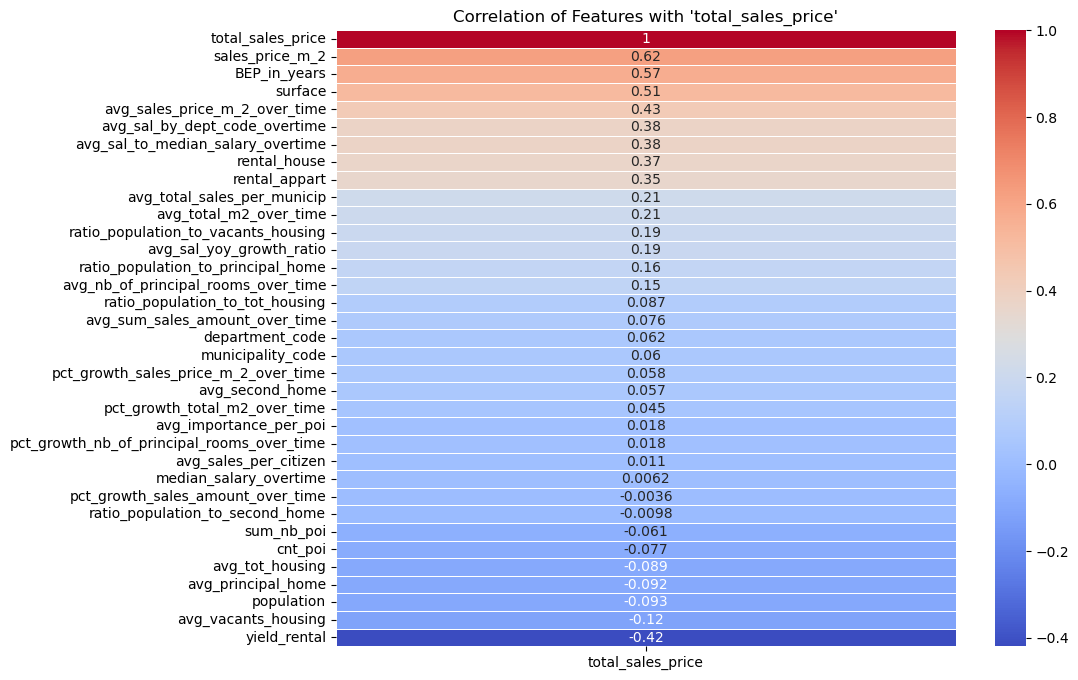

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Get correlation values with 'sales_price_m_2' (make sure the column name exists)
sales_price_corr = corr_matrix['total_sales_price'].sort_values(ascending=False)

# Display the top correlated features
print(sales_price_corr)

# Plot correlation as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['total_sales_price']].sort_values(by='total_sales_price', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with 'total_sales_price'")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Data Preprocessing

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Convert all numeric columns to float64 
df[numeric_cols] = df[numeric_cols].astype(float)

# Fill missing values with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [12]:
# Encode categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [13]:

# Splitting Data
#X = df.drop(columns=['sales_price_m_2', 'yield_rental', 'avg_sales_price_m_2_over_time'])
#y_reg = df['sales_price_m_2']  # Target for regression
#y_class = (df['yield_rental'] > df['yield_rental'].median()).astype(int)  # High/Low investment

#y_time_series = df[['avg_sales_price_m_2_over_time']]  # Time series target

#X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
#X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [14]:
# Splitting Data

X = df[['department_code', 'municipality_code']]
#X = df.drop(columns=['sales_price_m_2', 'yield_rental', 'avg_sales_price_m_2_over_time'])
y_reg = df['sales_price_m_2']  # Target for regression

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_reg)

# Predict on the test set
y_pred_reg = reg_model.predict(X_test)

# Print regression metrics
print("Regression Metrics (Linear Regression):")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))


Regression Metrics (Linear Regression):
MSE: 3712550.391049766
MAE: 1331.3399758766489
R2 Score: 0.005967364414419918


In [16]:
import pickle

with open("/Users/aleksandrgulyanskiy/Desktop/linear_regression_model_Prello.pkl", "wb") as file:
    pickle.dump(reg_model, file)

In [17]:
# Regression Model (Random Forest)

reg_model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model_RF.fit(X_train, y_train_reg)
y_pred_reg = reg_model.predict(X_test)
print("Regression Metrics:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))

Regression Metrics:
MSE: 3712550.391049766
MAE: 1331.3399758766489
R2 Score: 0.005967364414419918


In [18]:
import pickle

with open("/Users/aleksandrgulyanskiy/Desktop/linear_regression_model_RF_Prello.pkl", "wb") as file:
    pickle.dump(reg_model_RF, file)

In [19]:
max_value = df['sales_price_m_2'].max()
min_value = df['sales_price_m_2'].min()

print(f"sales_price_m_2: {max_value}")
print(f"sales_price_m_2: {min_value}")

sales_price_m_2: 54386.0
sales_price_m_2: 152.0


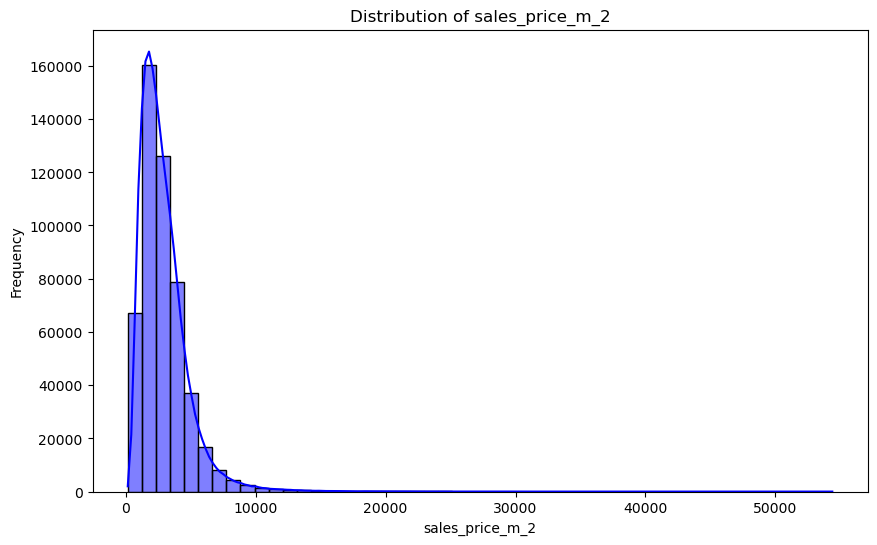

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['sales_price_m_2'], bins=50, kde=True, color='blue')
plt.xlabel('sales_price_m_2')
plt.ylabel('Frequency')
plt.title('Distribution of sales_price_m_2')
plt.show()

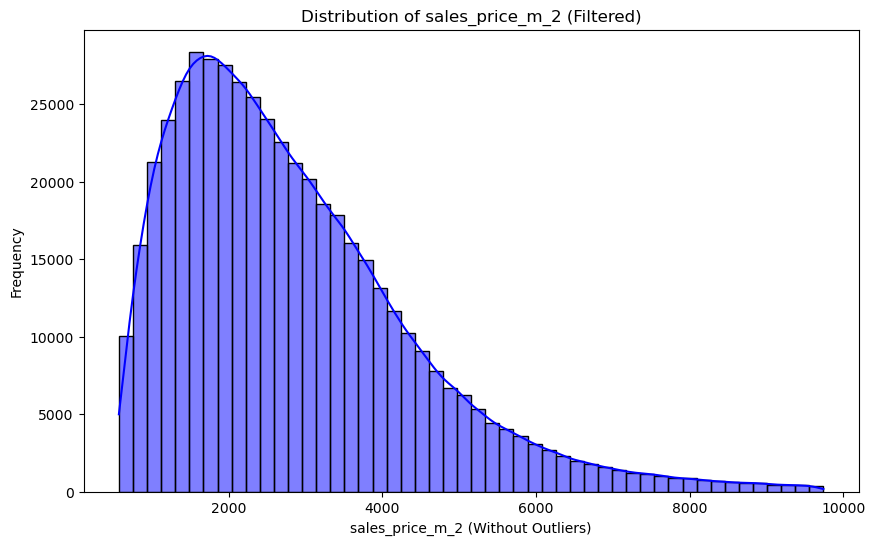

In [21]:
filtered_df = df[(df['sales_price_m_2'] > df['sales_price_m_2'].quantile(0.01)) & 
                 (df['sales_price_m_2'] < df['sales_price_m_2'].quantile(0.99))]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['sales_price_m_2'], bins=50, kde=True, color='blue')
plt.xlabel('sales_price_m_2 (Without Outliers)')
plt.ylabel('Frequency')
plt.title('Distribution of sales_price_m_2 (Filtered)')
plt.show()


In [22]:
print(df.columns)  
print(df.head())  

Index(['department_code', 'department_name', 'municipality_code',
       'rental_appart', 'rental_house', 'sales_price_m_2', 'surface',
       'total_sales_price', 'premise_type', 'yield_rental', 'BEP_in_years',
       'avg_sal_by_dept_code_overtime', 'median_salary_overtime',
       'avg_sal_to_median_salary_overtime', 'avg_sal_yoy_growth_ratio',
       'avg_total_sales_per_municip', 'avg_sales_per_citizen',
       'avg_principal_home', 'avg_second_home', 'avg_vacants_housing',
       'avg_tot_housing', 'population', 'ratio_population_to_principal_home',
       'ratio_population_to_second_home',
       'ratio_population_to_vacants_housing',
       'ratio_population_to_tot_housing', 'cnt_poi', 'sum_nb_poi',
       'avg_importance_per_poi', 'avg_sum_sales_amount_over_time',
       'pct_growth_sales_amount_over_time', 'avg_total_m2_over_time',
       'pct_growth_total_m2_over_time', 'avg_nb_of_principal_rooms_over_time',
       'pct_growth_nb_of_principal_rooms_over_time',
       'avg_sa